<a href="https://colab.research.google.com/github/adityadutt09/Phys498Projects/blob/main/Physics498_Project4_Topological_Insulators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Condensed Matter Physics**

*Lattices*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Hydrogen Chain Parameters:
H_a1 = 1 # armstrong unit
H_tau_0 = 0.0
#N = # No. of unit cells in the lattice


#Distorted Hydrogen Chain Parameters:
dH_a1 = 2 # armstrong units
dH_tau_0 = 0.0
dH_tau_1 = 0.8

*Real Space Functions*

In [ ]:
#Def: Labels <- function that takes in the number of unit cells and the type of 
#               chain and returns the labels assigned to each atom in the chain.
#N <- number of unit cells
#chain_type <- can be either hydrogen chain ('H') or distorted hydrogen chain ('dH')

def Labels(N, chain_type):
  labels = []

  if chain_type == 'H':
    labels = [(i,1) for i in range(N)]

  elif chain_type == 'dH':
    for i in range(N):
      labels.append((i,1))
      labels.append((i,2))

  return labels

def LabeltoR(myLabel, chain_type):
  if chain_type == 'H':
    return myLabel[0] * 1.0

  elif chain_type == 'dH':
    return myLabel[0] * 2.0 +  (myLabel[1] - 1)* 0.8  

def LabeltoIndex(myLabel, chain_type):
  if chain_type == 'H':
    return myLabel[0]
  elif chain_type == 'dH':
    return myLabel[0] * 2 + (myLabel[1] - 1)


In [ ]:
#Testing Label to Index
print(LabeltoIndex((3,2), 'dH'))

#Testing Label to R
print(LabeltoR((3,2), 'dH'))

*Fourier Space Functions*

In [ ]:
def LabeltoK(N, myLabel, chain_type):
  if chain_type == 'H':
    a1 = 1
    b1 = 2*np.pi/(N*abs(a1))  

  elif chain_type == 'dH':
    a1 = 2
    b1 = 2*np.pi/(N*abs(a1))
  
  return myLabel[0]*b1 

In [ ]:
#Testing Label to K
print(LabeltoK(6, (3,1), 'H'))

True
True


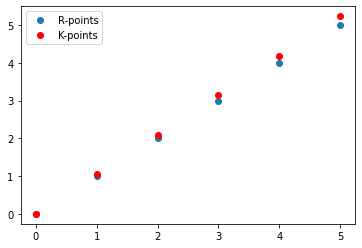

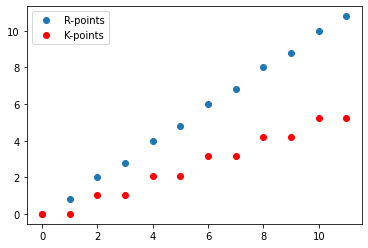

In [ ]:
#Visual Tests
labelsH = Labels(6, 'H')
pointsH = [LabeltoR(myLabel, 'H') for myLabel in labelsH]
mlabelsH = Labels(6, 'H')
mpointsH = [LabeltoK(6,myLabel, 'H') for myLabel in mlabelsH]


plt.figure()
plt.plot(pointsH, 'o', label = 'R-points')
plt.plot(mpointsH, 'ro', label = 'K-points')
plt.legend()

labelsdH = Labels(6, 'dH')
pointsdH = [LabeltoR(myLabel, 'dH') for myLabel in labelsdH]
mlabelsdH = Labels(6, 'dH')
mpointsdH = [LabeltoK(6,myLabel, 'H') for myLabel in mlabelsdH]

plt.figure()
plt.plot(pointsdH, 'o', label = 'R-points')
plt.plot(mpointsdH, 'ro', label = 'K-points')
plt.legend()

#Testing label to index:
index = np.random.randint(6)
l = labelsH[index]
print(labelsH[LabeltoIndex(l, 'H')] == labelsH[index])

l = labelsdH[index]
print(labelsdH[LabeltoIndex(l, 'dH')] == labelsdH[index])


*Scaling to 2D Functions*

In [ ]:
#2D Functions
def Labels2D(N1, N2):
  labels = []
  for j in range(N2):
    for i in range(N1):
      labels.append((i, j, 1))
      labels.append((i, j, 2))
  
  return labels

def LabeltoR2D(myLabel):
  return [myLabel[0] + myLabel[1]*np.cos(np.pi/3), myLabel[1]*np.sin(np.pi/3) + (myLabel[2]-1)*(1/np.sqrt(3))]

def LabeltoIndex2D(N1, N2, myLabel):
  return 2*(myLabel[0] + N1 * myLabel[1]) + (myLabel[2] - 1) 

In [ ]:
#2D Momentum Functions
def LabeltoK2D(N1, N2, myLabel):
  b1 = ((2.0*np.pi)/N1)*np.array([1.0, -1.0/np.sqrt(3)], dtype = float)
  b2 = ((2.0*np.pi)/N2)*np.array([0.0, 2.0/np.sqrt(3)], dtype = float)
  return np.around(myLabel[0]*b1 + myLabel[1]*b2, 3)

True


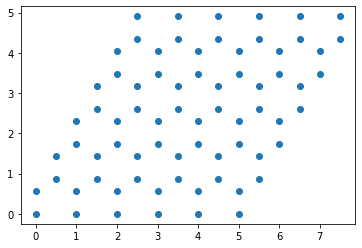

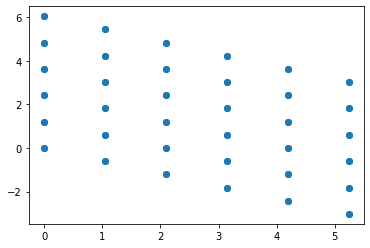

In [ ]:
#Visual Testing
N1 = 6
N2 = 6
myList = Labels2D(N1, N2)
Kx = [LabeltoK2D(N1, N2, i)[0] for i in myList]
Ky = [LabeltoK2D(N1, N2, i)[1] for i in myList]
Rx = [LabeltoR2D(i)[0] for i in myList]
Ry = [LabeltoR2D(i)[1] for i in myList]

plt.figure()
plt.plot(Rx, Ry, 'o')
plt.figure()
plt.plot(Kx, Ky, 'o')

#Testing Label to Index
index = np.random.randint(12)
l = myList[index]
print(myList[LabeltoIndex2D(N1, N2, l)] == myList[index])

## **Tight Binding Models**

*Generating the Hamiltonian for Hydrogen Chain*

In [ ]:
#Build the Hamiltonian for Hydrogen Chain:
def buildHamiltonian_H(N):
  H = np.zeros((N,N))
  H = np.diag(-1*np.ones(N-1), 1) + np.diag(-1*np.ones(N-1), -1)
  H[0, -1] = -1
  H[-1, 0] = -1
  return H

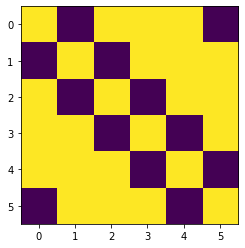

In [ ]:
#Testing
H_r = buildHamiltonian_H(6)
plt.imshow(H_r)

*Fourier Space*

In [ ]:
def generateF_H(N):
  F = np.zeros((N,N), dtype = np.complex128)
  
  for i in range(N):
    for j in range(N):
      F[i,j] = (1/np.sqrt(N))*np.exp(complex(0,LabeltoK(N, (j,1), 'H')*LabeltoR((i,1), 'H')))

  return F  

FH = generateF_H(6)

In [ ]:
H_k = np.matrix.getH(FH)@H_r@FH

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Energy vs k')

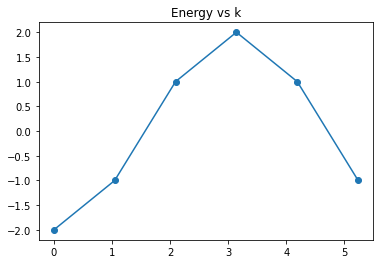

In [ ]:
index = range(len(np.diag(H_k)))
k_list = [LabeltoK(6,(i,1), 'H') for i in index]
E_list = np.diag(H_k)

plt.figure()
plt.plot(k_list, E_list, 'o-')
plt.title('Energy vs k')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


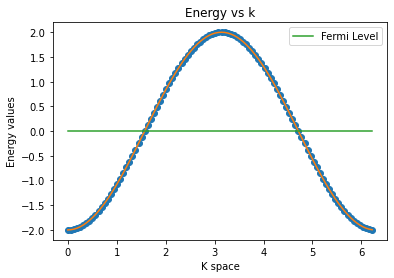

In [ ]:
#Same graph with N = 100
FH100 = generateF_H(100)

H_r100 = buildHamiltonian_H(100)
H_k100 = np.matrix.getH(FH100)@H_r100@FH100

index = range(len(np.diag(H_k100)))
k_list100 = [LabeltoK(100,(i,1), 'H') for i in index]
E_list100 = np.diag(H_k100)

plt.figure()
plt.plot(k_list100, E_list100, 'o-')
plt.plot(k_list100, -2*np.cos(k_list100))
plt.plot([0, k_list100[-1]], [0, 0], label = 'Fermi Level')
plt.xlabel('K space')
plt.ylabel('Energy values')
plt.title('Energy vs k')
plt.legend()

***Fourier Space for Distorted Hydrogen Chain***

In [ ]:
#Define N
N = 3

In [ ]:
def buildHamiltonian_dH(N):
  H = np.zeros((2*N,2*N), dtype = np.complex128)
  for i in range(N):
    H[LabeltoIndex((i,1), 'dH'), LabeltoIndex((i,2), 'dH')] = -1
    H[LabeltoIndex((i,2), 'dH'), LabeltoIndex(((i+1)%N,1), 'dH')] = -0.1  
   
  return (H + H.T)

In [ ]:
Hr_dist = buildHamiltonian_dH(N)

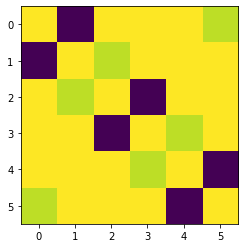

In [ ]:
plt.imshow(np.real(Hr_dist))

In [ ]:
#Test if H_R is hermitian for distorted hydrogen chain
(Hr_dist) == np.matrix.getH(Hr_dist)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [ ]:
def delta(index1, index2):
  return index1 == index2

def generateF_dH(N):
  F = np.zeros((2*N,2*N), dtype = np.complex128)
  labels = Labels(N, 'dH')
  
  for i in range(2*N):
    for j in range(2*N):
      F[i,j] = (1/np.sqrt(N))*delta(labels[j][1], labels[i][1])*np.exp(complex(0, LabeltoK(N, labels[j], 'dH')*LabeltoR(labels[i], 'dH')))

  return F  

In [ ]:
FdH_N = generateF_dH(N)

# print(FdH_3[2,2])
# print((np.matrix.getH(FdH_3))[2,2])
# print(FdH_N@np.matrix.getH(FdH_N))

(FdH_N@np.matrix.getH(FdH_N)).astype(int) == np.eye(2*N)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [ ]:
Hk_dist = np.matrix.getH(FdH_N)@(Hr_dist@FdH_N)

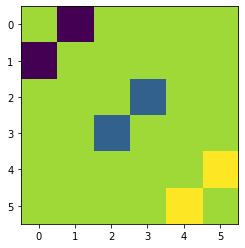

In [ ]:
plt.imshow(np.real(Hk_dist))

In [ ]:
import numpy.linalg as la

In [ ]:
def blockDiagonalise(matrix, N):
  E_list = []
  for i in range(0, 2*N, 2):
    eigvals, eigvecs = la.eigh(matrix[i:i+2, i:i+2])
    E_list.append(eigvals[0])
    E_list.append(eigvals[1])
  
  return E_list

In [ ]:
energies = blockDiagonalise(Hk_dist, N)

In [ ]:
#Check if eigenvalues of Hr and Hk are the same
print(energies)
print(blockDiagonalise(Hr_dist, N))

[-1.1000000000000003, 1.1000000000000003, -0.953939201416946, 0.953939201416946, -0.9539392014169458, 0.9539392014169458]
[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0]


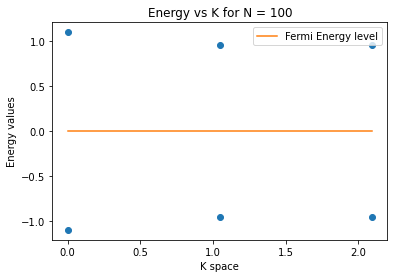

In [ ]:
KdH_N = [LabeltoK(N, l, 'dH') for l in Labels(N, 'dH')]

plt.figure()
plt.plot(KdH_N, energies, 'o')
plt.plot([0,KdH_N[-1]], [0, 0], label = 'Fermi Energy level')
plt.xlabel('K space')
plt.ylabel('Energy values')
plt.title('Energy vs K for N = 100')
plt.legend()

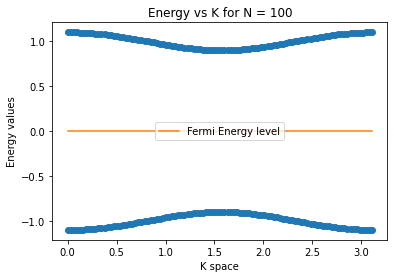

In [ ]:
#For N = 100
N = 100

#Building the real-space Hamiltonian
Hr_dist_N = buildHamiltonian_dH(N)

#Fourier Space Matrix
FdH_N = generateF_dH(N)

#Transforming to Fourier Space
Hk_dist_N = np.matrix.getH(FdH_N) @ Hr_dist_N @ FdH_N

#Finding the Energies (eigenvalues)
energies_N = blockDiagonalise(Hk_dist_N, N)

#Creating the momentums, k, for each block
KdH_N = [LabeltoK(N, l, 'dH') for l in Labels(N, 'dH')]

#Relevant Plots
# plt.figure()
# plt.imshow(np.real(Hr_dist_N))

# plt.figure()
# plt.imshow(np.real(Hk_dist_N))

plt.figure()
plt.plot(KdH_N, energies_N, 'o')
plt.plot([0,KdH_N[-1]], [0, 0], label = 'Fermi Energy level')
plt.xlabel('K space')
plt.ylabel('Energy values')
plt.title('Energy vs K for N = 100')
plt.legend()

#Tests
# print((Hr_dist) == np.matrix.getH(Hr_dist))
# print(FdH_3[2,2])
# print((np.matrix.getH(FdH_3))[2,2])
# print(FdH_N@np.matrix.getH(FdH_N))
# print((FdH_N@np.matrix.getH(FdH_N)).astype(int) == np.eye(2*N))

## **Graphene Model**

In [ ]:
N1 = 3
N2 = 3

In [ ]:
graphene_labels = Labels2D(N1,N2)
print(graphene_labels)

[(0, 0, 1), (0, 0, 2), (1, 0, 1), (1, 0, 2), (2, 0, 1), (2, 0, 2), (0, 1, 1), (0, 1, 2), (1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2), (0, 2, 1), (0, 2, 2), (1, 2, 1), (1, 2, 2), (2, 2, 1), (2, 2, 2)]


In [ ]:
#3 rules for each neighbour to build the Hamiltonian
#neighbours <- takes in a lattice point of atom type 'a'(1) 
#              and gives its neighbours
def neighbours(N1, N2, myLabel):
  neigh_1 = (myLabel[0], myLabel[1], myLabel[2]+1)
  neigh_2 = (myLabel[0], (myLabel[1]-1)%N2, myLabel[2]+1)
  neigh_3 = ((myLabel[0]+1)%N1,(myLabel[1]-1)%N2, myLabel[2]+1)
  return (neigh_1, neigh_2, neigh_3)

In [ ]:
#Test
neighbours(3,2,(2,1,1))

((2, 1, 2), (2, 0, 2), (0, 0, 2))

In [ ]:
def buildHamiltonian_2D(N1, N2):
  H = np.zeros((2*N1*N2, 2*N1*N2), dtype = np.complex128)
  label2D = Labels2D(N1, N2)

  for i in range(N1):
    for j in range(N2): 
      neigh_labels = neighbours(N1, N2, (i,j,1))
      neigh_index = [LabeltoIndex2D(N1, N2, x) for x in neigh_labels]   
      H[LabeltoIndex2D(N1, N2, (i,j, 1)), neigh_index] = -1
      # H[neigh_index, LabeltoIndex2D(N1, N2, (i,j, 1))] = -1
      
  return H + H.T

[[ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.]
 [-1.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.]
 [ 0.  0. -1.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.]
 [ 0.  0.  0. -1.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0. -1.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [-1.  0.  0.  0. -1.  0.

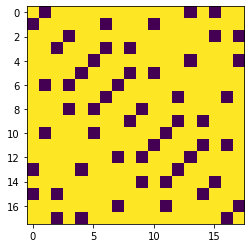

In [ ]:
Hr_graphene = buildHamiltonian_2D(N1, N2)

print(np.matrix(np.real(Hr_graphene)))
# print(Hr_graphene[0][1], Hr_graphene[0][11], Hr_graphene[0][15])
plt.imshow(np.real(Hr_graphene))

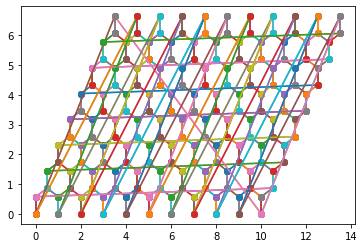

In [ ]:
H_test_graph = buildHamiltonian_2D(11,8)
myLabel = Labels2D(11,8)
plt.figure()
for i in range(len(H_test_graph)):
  for j in range(len(H_test_graph)):
    if(H_test_graph[i,j] != 0):
      point_i = LabeltoR2D(myLabel[i])
      point_j = LabeltoR2D(myLabel[j])
      plt.plot([point_i[0], point_j[0]], [point_i[1], point_j[1]], 'o-')

In [ ]:
#Constructing F
def generateF_2D(N1, N2):
  F = np.zeros((2*N1*N2, 2*N1*N2), dtype = np.complex128)
  labels = Labels2D(N1, N2)
  
  for i in range(2*N1*N2):
    for j in range(2*N1*N2):
      F[i,j] = (1/np.sqrt(N1*N2))*delta(labels[j][2], labels[i][2])*np.exp(complex(0, np.dot(LabeltoK2D(N1, N2, labels[j]), LabeltoR2D(labels[i]))))
  
  return F

In [ ]:
F_graphene = generateF_2D(N1, N2)

In [ ]:
# generateF_dH
# print(F_graphene)
# print(F_graphene @ np.matrix.getH(F_graphene))
# print((F_graphene @ np.matrix.getH(F_graphene)).astype(int) == np.eye(2*N1*N2))

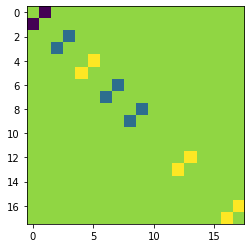

In [ ]:
#Rotate Matrix: Hk = F^T @ Hr @ F
Hk_graphene =  np.matrix.getH(F_graphene) @ Hr_graphene @ F_graphene
plt.imshow(np.real(Hk_graphene))

In [ ]:
#Diagonalise
E_graphene = blockDiagonalise(Hk_graphene, N1*N2)
kx = [LabeltoK2D(N1, N2, lab)[0] for lab in Labels2D(N1, N2)]
ky = [LabeltoK2D(N1, N2, lab)[1] for lab in Labels2D(N1, N2)]

In [ ]:
print(E_graphene)
print(blockDiagonalise(Hr_graphene, N1*N2))

[-3.0, 3.0, -1.7320508070605236, 1.7320508070605236, -1.73205063173918, 1.73205063173918, -1.7320506006165683, 1.7320506006165683, -1.7320505535875346, 1.7320505535875346, -5.04235344975229e-08, 5.04235344975229e-08, -1.7320507547244528, 1.7320507547244528, -1.6847783635112527e-07, 1.6847783635112527e-07, -1.7320507192436458, 1.7320507192436458]
[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0]


## *Three Types of Plotting*

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

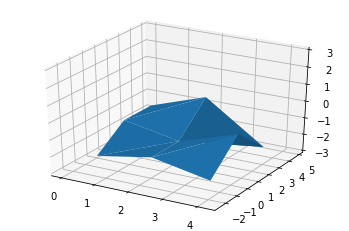

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_trisurf(kx, ky, E_graphene)

In [ ]:
E_diff = []
for i in range(0,len(E_graphene)-1, 2):
  E_diff.append(E_graphene[i+1] - E_graphene[i])

print([int(i) for i in E_diff])

[6, 3, 3, 3, 3, 0, 3, 0, 3]


In [ ]:
#Larger Lattices
Hr_graph_27 = buildHamiltonian_2D(27, 27)
F_graph_27 = generateF_2D(27, 27)
Hk_graph_27 = F_graph_27.transpose().conjugate() @ Hr_graph_27 @ F_graph_27
E_graph_27 = blockDiagonalise(Hk_graph_27, 27*27)

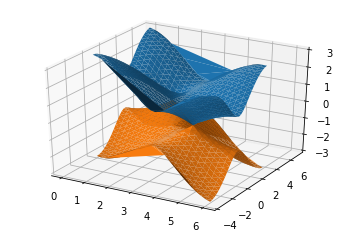

In [ ]:
#3D Plot
kx_27 = [LabeltoK2D(27, 27, lab)[0] for lab in Labels2D(27, 27)]
ky_27 = [LabeltoK2D(27, 27, lab)[1] for lab in Labels2D(27, 27)]
kx_27_half = [kx_27[i] for i in range(len(kx_27)) if i%2 == 0]
ky_27_half = [ky_27[i] for i in range(len(ky_27)) if i%2 == 0]

#Positive
E_pos_27 = [x for x in E_graph_27 if x > 0]
#Negative
E_neg_27 = [x for x in E_graph_27 if x<0]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_trisurf(kx_27_half, ky_27_half, E_pos_27)
ax.plot_trisurf(kx_27_half, ky_27_half, E_neg_27)

In [ ]:
E_diff_27 = []
for i in range(0,len(E_graph_27)-1, 2):
  if(E_graph_27[i+1] - E_graph_27[i] > 1e-8):
    E_diff_27.append(E_graph_27[i+1] - E_graph_27[i])
  else:
    E_diff_27.append(0)

for i in range(len(E_diff_27)):
  if ((E_diff_27[i]) == 0):
    print(i, E_diff_27[i])

In [ ]:
#Contour Plotting
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.contour(kx, ky, np.array(E_diff_27).reshape((27,27)))

## **Boron Nitride Model**

In [ ]:
#Define constant M
M = 2
N1 = 3
N2 = 3

In [ ]:
labelBN = Labels2D(N1, N2)

In [ ]:
Hr_BN = buildHamiltonian_2D(N1, N2)
for i in range(2*N1*N2):
  if(labelBN[i][2] == 1):
    Hr_BN[i,i] = M
  else:
    Hr_BN[i,i] = -M

F_BN = generateF_2D(N1, N2)

Hk_BN = F_BN.transpose().conjugate() @ Hr_BN @ F_BN

E_BN = blockDiagonalise(Hk_BN, N1*N2)
kx_BN = [LabeltoK2D(N1, N2, lab)[0] for lab in Labels2D(N1, N2)]
ky_BN = [LabeltoK2D(N1, N2, lab)[1] for lab in Labels2D(N1, N2)]

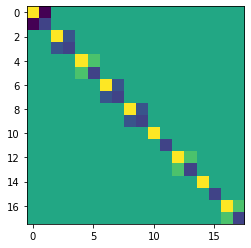

In [ ]:
plt.figure()
plt.imshow(np.real(Hk_BN))

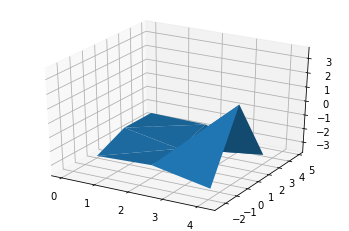

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_trisurf(kx_BN, ky_BN, E_BN)

In [ ]:
E_diff_BN = []
for i in range(0,len(E_BN)-1, 2):
  E_diff_BN.append(E_BN[i+1] - E_BN[i])

E_diff_BN

[7.211102550927977,
 5.291502621463589,
 5.291502391914074,
 5.291502351165011,
 5.291502289589558,
 4.0,
 5.291502552939589,
 4.000000000000016,
 5.291502506484308]

In [ ]:
#Larger BN Lattice
M = 0.1
Hr_BN_27 = buildHamiltonian_2D(27, 27)
labelBN_27 = Labels2D(27,27)

for i in range(2*27*27):
  if(labelBN_27[i][2] == 1):
    Hr_BN_27[i,i] = M
  else:
    Hr_BN_27[i,i] = -M

F_BN_27 = generateF_2D(27, 27)

Hk_BN_27 = F_BN_27.transpose().conjugate() @ Hr_BN_27 @ F_BN_27

E_BN_27 = blockDiagonalise(Hk_BN_27, 27*27)

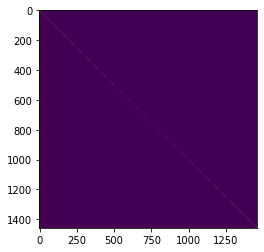

In [ ]:
plt.figure()
plt.imshow(abs(Hk_BN_27))

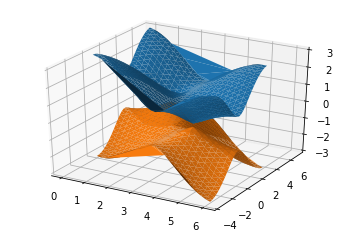

In [ ]:
#Positive
Epos_BN_27 = [x for x in E_BN_27 if x > 0]
#Negative
Eneg_BN_27 = [x for x in E_BN_27 if x<0]

#3D Plot
# kx_BN_27 = [LabeltoK2D(27, 27, lab)[0] for lab in labelBN_27]
# ky_BN_27 = [LabeltoK2D(27, 27, lab)[1] for lab in labelBN_27]
# kx_BN_27_half = [kx_BN_27[i] for i in range(len(kx_BN_27)) if i%2 == 0]
# ky_BN_27_half = [ky_BN_27[i] for i in range(len(ky_BN_27)) if i%2 == 0]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_trisurf(kx_27_half, ky_27_half, Epos_BN_27)
ax.plot_trisurf(kx_27_half, ky_27_half, Eneg_BN_27)

# ax.plot_trisurf(kx_27, ky_BN_27, E_BN_27)

In [ ]:
E_diff_BN_27 = []
for i in range(0,len(E_BN_27)-1, 2):
  E_diff_BN_27.append(E_BN_27[i+1] - E_BN_27[i])

for i in range(len(E_diff_BN_27)):
  if ((E_diff_BN_27[i]) == 0):
    print(i, E_diff_BN_27[i])

## **Haldane Model**

In [ ]:
#constants
M = 0.1
t = 0.3
phi = 0.7

N1 = 3
N2 = 3

In [ ]:
#((1,1),1) -> ((0,1),1), ((1,0), 1), ((2,0), 1)
def secondNeighbours(N1, N2, myLabel):
  if(myLabel[2] == 1):
    neigh1 = ((myLabel[0]-1)%N1, myLabel[1], myLabel[2])
    neigh2 = (myLabel[0], (myLabel[1]+1)%N2, myLabel[2])
    neigh3 = ((myLabel[0]+1)%N1, (myLabel[1]-1)%N2, myLabel[2])
  else:
    neigh1 = ((myLabel[0]+1)%N1, myLabel[1], myLabel[2])
    neigh2 = (myLabel[0], (myLabel[1]-1)%N2, myLabel[2])
    neigh3 = ((myLabel[0]-1)%N1, (myLabel[1]+1)%N2, myLabel[2])

  return (neigh1, neigh2, neigh3)

In [ ]:
secondNeighbours(3,3, (2,1,2))

((0, 1, 2), (2, 0, 2), (1, 2, 2))

In [ ]:
def buildHamiltonian_Hald(N1, N2, constants):
  (M, t, phi) = constants
  H = buildHamiltonian_2D(N1, N2)

  for i in range(2*N1*N2):
    if(Labels2D(N1, N2)[i][2] == 1):
      H[i,i] = M
    else:
      H[i,i] = -M

  for i in range(N1):
    for j in range(N2):
      second_labels_1 = secondNeighbours(N1, N2, (i,j,1))
      second_labels_2 = secondNeighbours(N1, N2, (i,j,2))
      
      second_index1 = [LabeltoIndex2D(N1, N2, x) for x in second_labels_1]
      second_index2 = [LabeltoIndex2D(N1, N2, x) for x in second_labels_2]
      
      H[LabeltoIndex2D(N1, N2, (i,j,1)), second_index1] = -t*np.exp(complex(0, phi))
      H[second_index1, LabeltoIndex2D(N1, N2, (i,j,1))] = -t*np.exp(complex(0, -phi))
      
      H[LabeltoIndex2D(N1, N2, (i,j,2)), second_index2] = -t*np.exp(complex(0, phi))
      H[second_index2, LabeltoIndex2D(N1, N2, (i,j,2))] = -t*np.exp(complex(0, -phi))
  return H

In [ ]:
Hr_Haldane = buildHamiltonian_Hald(N1, N2, (M,t, phi))

#To check if Hr is Hermitian
Hr_Haldane == Hr_Haldane.transpose().conjugate()

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],

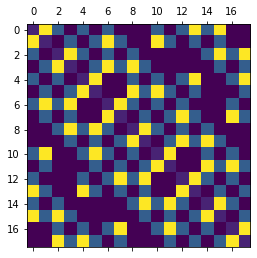

In [ ]:
plt.matshow(abs(Hr_Haldane))

<Figure size 432x288 with 0 Axes>

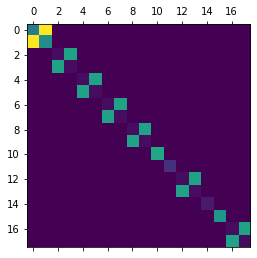

In [ ]:
F_Haldane = generateF_2D(N1, N2)
Hk_Haldane = F_Haldane.conjugate().transpose() @ Hr_Haldane @ F_Haldane

#Test for Block Diagonal Hk
plt.figure()
plt.matshow(abs(Hk_Haldane))

In [ ]:
E_Haldane = blockDiagonalise(Hk_Haldane, N1*N2)

Epos_hald = [x for x in E_Haldane if x>0]
Eneg_hald = [x for x in E_Haldane if x<0]

kx = [LabeltoK2D(N1, N2, l)[0] for l in Labels2D(N1, N2)] 
ky = [LabeltoK2D(N1, N2, l)[1] for l in Labels2D(N1, N2)]

kx_half = [kx[k] for k in range(len(kx)) if k%2 == 0]
ky_half = [ky[m] for m in range(len(ky)) if m%2 == 0]

# print(len(kx), len(ky))

18 18


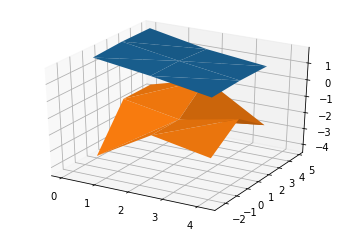

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_trisurf(kx_half, ky_half, Epos_hald)
ax.plot_trisurf(kx_half, ky_half, Eneg_hald)


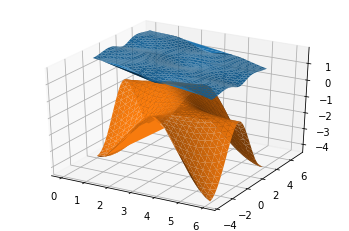

In [ ]:
#27x27 Lattice
N1 = 27
N2 = 27

M = 0.1
t = 0.3
phi = 0.7

F_hald = generateF_2D(N1, N2)
kx = [LabeltoK2D(N1, N2, l)[0] for l in Labels2D(N1, N2)] 
ky = [LabeltoK2D(N1, N2, l)[1] for l in Labels2D(N1, N2)]

kx_half = [kx[k] for k in range(len(kx)) if k%2 == 0]
ky_half = [ky[m] for m in range(len(ky)) if m%2 == 0]

Hr_hald = buildHamiltonian_Hald(N1, N2, (M,t, phi))
Hk_hald = F_hald.conjugate().transpose() @ Hr_hald @ F_hald
E_hald = blockDiagonalise(Hk_hald, N1*N2)

Epos_hald = [x for x in E_hald if x>=0]
Eneg_hald = [x for x in E_hald if x<=0]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
# ax.plot_trisurf(kx, ky, E_hald)
ax.plot_trisurf(kx_half, ky_half, Epos_hald)
ax.plot_trisurf(kx_half, ky_half, Eneg_hald)

In [ ]:
E_diff_hald = []
for i in range(0,len(E_hald)-1, 2):
  E_diff_hald.append(E_hald[i+1] - E_hald[i])

for i in range(len(E_diff_hald)):
  if ((E_diff_hald[i]) == 0):
    print(i, E_diff_hald[i])

# **Topological Insulators**

In [ ]:
def Energydiff(E):
  E_diff = []
  for i in range(0,len(E)-1, 2):
    E_diff.append(E[i+1] - E[i])

  return E_diff

In [ ]:
#Lattice size
N1 = 27
N2 = 27

#Constants
M = np.linspace(0,2, 11)
t = 0.3
phi = 0.7

F_hald = generateF_2D(N1, N2)
kx = [LabeltoK2D(N1, N2, l)[0] for l in Labels2D(N1, N2)] 
ky = [LabeltoK2D(N1, N2, l)[1] for l in Labels2D(N1, N2)]
kx_half = [kx[k] for k in range(len(kx)) if k%2 == 0]
ky_half = [ky[m] for m in range(len(ky)) if m%2 == 0]

gap = []

for m in M:
  Hr_hald = buildHamiltonian_Hald(N1, N2, (m,t, phi))
  Hk_hald = F_hald.conjugate().transpose() @ Hr_hald @ F_hald
  E_hald = blockDiagonalise(Hk_hald, N1*N2)
  Ediff_hald = Energydiff(E_hald)
  gap.append(min(Ediff_hald))

Text(0, 0.5, 'Energy')

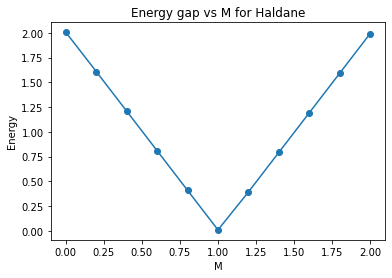

In [ ]:
plt.figure()
plt.plot(M, gap, 'o-')
plt.title('Energy gap vs M for Haldane')
plt.xlabel('M')
plt.ylabel('Energy')

## **Computing the Berry Phase**

In [ ]:
def momentumLabels2D(N1,N2):
  labels = []
  for j in range(N2):
    for i in range(N1):
      labels.append((i,j))
  
  return labels

def KLabeltoIndex2D(N1, N2, myLabel):
  return myLabel[0] + N1*myLabel[1]

In [ ]:
def BerryPhase(Hk, N1, N2):
  B = np.zeros((N1*N2, N1*N2))
  e = []

  #BlockDiagonalise for N1 = N2
  for i in range(0, 2*N1*N2, 2):
    w,v = la.eigh(Hk[i:i+2, i:i+2])
    #Just use the 1st eigenvector
    e.append(np.copy(v[:,1]))
  
  #Compute the Berry Phase
  for i in range(N1*N2):
    for j in range(N1*N2):
      B[i,j] = np.angle(np.vdot(e[i], e[j]))

  return B

In [ ]:
def Berryflux(B, N1, N2):
  klabels = momentumLabels2D(N1, N2)
  flux = 0
  #Loop through the k's
  for mylabel in klabels:
    a = KLabeltoIndex2D(N1, N2,  mylabel)
    b = KLabeltoIndex2D(N1, N2, [(mylabel[0] + 1) % N1, mylabel[1]] )
    c = KLabeltoIndex2D(N1, N2, [(mylabel[0] + 1) % N1, (mylabel[1] + 1) % N2])
    d = KLabeltoIndex2D(N1, N2, [mylabel[0],  (mylabel[1] + 1) % N2] )
    flux += (-np.pi + (B[a, b] + B[b,c] + B[c, d] + B[d, a] + np.pi) % (2*np.pi) )
    
  return flux

In [ ]:
N1 = 27
N2 = 27
F = generateF_2D(N1, N2)

In [ ]:
Hr = buildHamiltonian_Hald(N1, N2, (0.8, 0.3, 0.7))
Hk = F.transpose().conjugate() @ Hr @ F
B1 = BerryPhase(Hk, N1, N2)

In [ ]:
Hr = buildHamiltonian_Hald(N1, N2, (1.2, 0.3, 0.7))
Hk = F.transpose().conjugate() @ Hr @ F
B2 = BerryPhase(Hk, N1, N2)

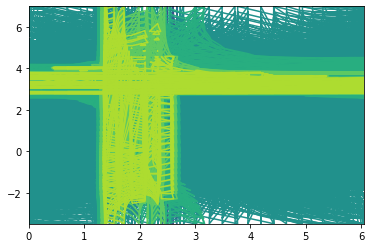

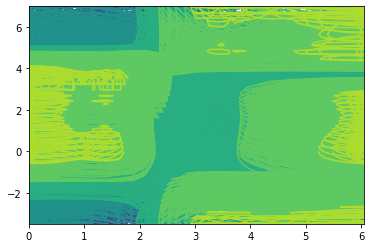

In [ ]:
#Plotting Berry curvature vs (kx, ky)
kx = [LabeltoK2D(N1, N2, l)[0] for l in Labels2D(N1, N2)] 
ky = [LabeltoK2D(N1, N2, l)[1] for l in Labels2D(N1, N2)]
kx_half = [kx[k] for k in range(len(kx)) if k%2 == 0]
ky_half = [ky[m] for m in range(len(ky)) if m%2 == 0]

X,Y = np.meshgrid(kx_half, ky_half)

plt.figure()
plt.contour(X,Y, np.real(B1))

plt.figure()
plt.contour(X,Y, np.real(B2))

<Figure size 432x288 with 0 Axes>

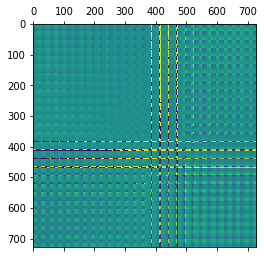

<Figure size 432x288 with 0 Axes>

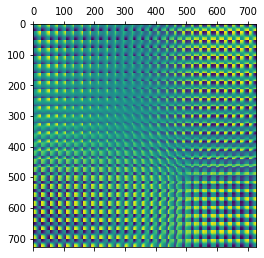

In [ ]:
#Plotting the Berry Curvature for M = 0.8 and M = 1.2
plt.figure()
plt.matshow(B1)

plt.figure()
plt.matshow(B2)

## **Graphing the Chern Number vs M**

In [ ]:
#Lattice size
N1 = 27
N2 = 27

#Constants
M = np.linspace(0,2, 11)
t = 0.3
phi = 0.7

F_hald = generateF_2D(N1, N2)
kx = [LabeltoK2D(N1, N2, l)[0] for l in Labels2D(N1, N2)] 
ky = [LabeltoK2D(N1, N2, l)[1] for l in Labels2D(N1, N2)]
kx_half = [kx[k] for k in range(len(kx)) if k%2 == 0]
ky_half = [ky[m] for m in range(len(ky)) if m%2 == 0]

In [ ]:
chernlist = []
for m in M:
  Hr_hald = buildHamiltonian_Hald(N1, N2, (m,t, phi))
  Hk_hald = F_hald.conjugate().transpose() @ Hr_hald @ F_hald
  B = BerryPhase(Hk_hald, N1, N2)
  chernlist.append((Berryflux(B, N1, N2))/(2*np.pi))

Text(0, 0.5, 'Chern Number')

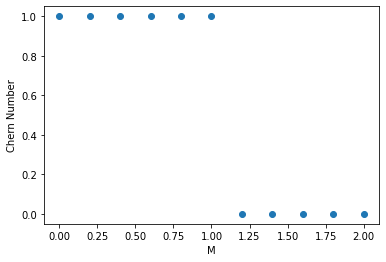

In [ ]:
plt.figure()
plt.plot(M, chernlist, 'o')
plt.xlabel('M')
plt.ylabel('Chern Number')

## **Edge Modes**

In [ ]:
def neighboursperiodic(N1, N2, myLabel, const_dir):
  n = neighbours(N1, N2, myLabel)
  if(const_dir == 'x'):
    #Right-edge
    if(myLabel[0] == N1-1):
      new_neigh = (n[0], n[1])
    else:
      new_neigh = n

  if(const_dir == 'y'):
    #Bottom-edge
    if(myLabel[1] == 0):
      new_neigh = (n[0])
    else:
      new_neigh = n

  return new_neigh

def secondNeighboursPeriodic(N1, N2, myLabel, const_dir):
  n = secondNeighbours(N1, N2, myLabel)
  if(const_dir == 'x'):
    #Left-Edge
    if(myLabel[0] == 0):
      if(myLabel[2] == 1):
        return (n[1], n[2])
      else:
        return (n[0],n[1])

    #Right-Edge  
    elif(myLabel[0] == N1-1):
      if(myLabel[2] == 1):
        return (n[0], n[1])
      else:
        return (n[1],n[2])

    else:
      return n

  elif(const_dir == 'y'):
    #Bottom-edge
    if(myLabel[1] == 0):
      if(myLabel[2] == 1):
        return (n[0], n[1])
      else:
        return (n[0], n[2])

    elif(myLabel[1] == N2-1):
      if(myLabel[2] == 1):
        return (n[0], n[1])
      else:
        return (n[0], n[1])
    
    else:
      return n

In [ ]:
def EdgeModeHr(N1, N2, constants, const_dir):
  (M, t, phi) = constants
  H = np.zeros((2*N1*N2, 2*N1*N2), dtype = np.complex128)
  label2D = Labels2D(N1, N2)

  for i in range(N1):
    for j in range(N2): 
      #Nearest Neighbours
      neigh_labels = neighboursperiodic(N1, N2, (i,j,1), const_dir)
      neigh_index = [LabeltoIndex2D(N1, N2, x) for x in neigh_labels]   
      H[LabeltoIndex2D(N1, N2, (i,j, 1)), neigh_index] = -1
      H[neigh_index, LabeltoIndex2D(N1, N2, (i,j, 1))] = -1
      
      #Second Nearest Neighbours
      second_labels_1 = secondNeighboursPeriodic(N1, N2, (i,j,1), const_dir)
      second_labels_2 = secondNeighboursPeriodic(N1, N2, (i,j,2), const_dir)
      
      second_index1 = [LabeltoIndex2D(N1, N2, x) for x in second_labels_1]
      second_index2 = [LabeltoIndex2D(N1, N2, x) for x in second_labels_2]
      
      H[LabeltoIndex2D(N1, N2, (i,j,1)), second_index1] = -t*np.exp(complex(0, phi))
      H[second_index1, LabeltoIndex2D(N1, N2, (i,j,1))] = -t*np.exp(complex(0, -phi))
      
      H[LabeltoIndex2D(N1, N2, (i,j,2)), second_index2] = -t*np.exp(complex(0, phi))
      H[second_index2, LabeltoIndex2D(N1, N2, (i,j,2))] = -t*np.exp(complex(0, -phi))


  for i in range(2*N1*N2):
    if(Labels2D(N1, N2)[i][2] == 1):
      H[i,i] = M
    else:
      H[i,i] = -M
      
  return H

In [ ]:
N1 = 3
N2 = 3
Hr_edge = EdgeModeHr(N1, N2, (0.2, 0.3,0.7), 'x')
F = generateF_2D(N1, N2)
Hk_edge = F.transpose().conjugate() @ Hr_edge @ F

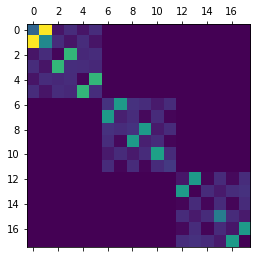

In [ ]:
plt.matshow(np.abs(Hk_edge))

In [ ]:
#Diagonalising and Finding the energies
E_edge = []
for i in range(0, 2*N1*N2, 2*N1):
  w,v = la.eigh(Hk_edge[i:i+2*N1, i:i+2*N1])
  for eig in w:
    E_edge.append(eig)

E_edge

In [ ]:
ky = [LabeltoK2D(N1, N2, l)[1] for l in Labels2D(N1, N2)]

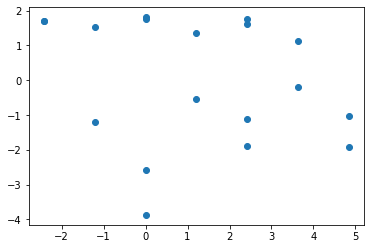

In [ ]:
plt.figure()
plt.plot(ky, E_edge, 'o')

# **PLotting $E$ vs $k_y$**

Text(0.5, 0, 'ky')

<Figure size 432x288 with 0 Axes>

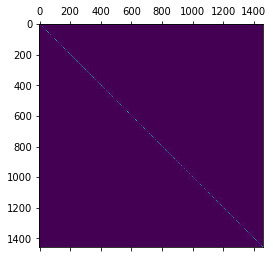

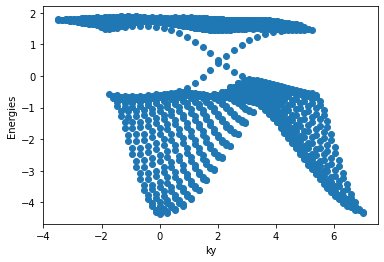

In [ ]:
N1 = 27
N2 = 27
Hr_edge = EdgeModeHr(N1, N2, (0.2, 0.3,0.7), 'x')
F = generateF_2D(N1, N2)

Hk_edge = F.transpose().conjugate() @ Hr_edge @ F

# plt.figure()
# plt.matshow(np.abs(Hk_edge))

#Diagonalising and Finding the energies
E_edge = []
for i in range(0, 2*N1*N2, 2*N1):
  w,v = la.eigh(Hk_edge[i:i+2*N1, i:i+2*N1])
  for eig in w:
    E_edge.append(eig)

ky = [LabeltoK2D(N1, N2, l)[1] for l in Labels2D(N1, N2)]
plt.figure()
plt.plot(ky, E_edge, 'o')
plt.ylabel('Energies')
plt.xlabel('ky')

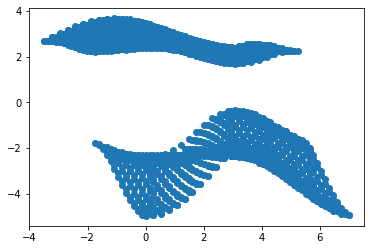

In [ ]:
Hr_edge = EdgeModeHr(N1, N2, (2.0, 0.3,0.7), 'x')
Hk_edge = F.transpose().conjugate() @ Hr_edge @ F

#Diagonalising and Finding the energies
E_edge = []
for i in range(0, 2*N1*N2, 2*N1):
  w,v = la.eigh(Hk_edge[i:i+2*N1, i:i+2*N1])
  for eig in w:
    E_edge.append(eig)

ky = [LabeltoK2D(N1, N2, l)[1] for l in Labels2D(N1, N2)]
plt.figure()
plt.plot(ky, E_edge, 'o')